Linear regression is a statistical model that allows to explain a dependent variable y based on variation in one or multiple independent variables (denoted x). It does this based on linear relationships between the independent and dependent variables.



In [1]:
import pandas as pd
!pip install boto
!pip install fsspec
!pip install s3fs
import boto

# import the data directly from s3 bucket
data = pd.read_csv('s3://articledatas3/simulated_data_house_price.csv', sep=';')

     |████████████████████████████████| 1.4 MB 13.4 MB/s 
     |████████████████████████████████| 136 kB 20.4 MB/s 
     |████████████████████████████████| 1.1 MB 35.9 MB/s 
     |████████████████████████████████| 59 kB 6.4 MB/s 
     |████████████████████████████████| 8.6 MB 11.0 MB/s 
     |████████████████████████████████| 144 kB 48.2 MB/s 
     |████████████████████████████████| 271 kB 45.9 MB/s 
     |████████████████████████████████| 94 kB 2.8 MB/s 
     |████████████████████████████████| 138 kB 45.1 MB/s 
  Created wheel for aiobotocore: filename=aiobotocore-2.2.0-py3-none-any.whl size=57108 sha256=c8240af7f05f07c281b3fc5b6869af964a91ceadec6624b9eae7a0e0833466be
  Stored in directory: /root/.cache/pip/wheels/5f/c1/90/d81f357ee479228ab98b7558b6a6af12234e5ee9c29ab5c16f
Successfully built aiobotocore
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency r

In [2]:
data.head()

,SellPrice,SquareMeterHouse,BedRooms,BathRooms,SquareMeterGarden
0,99000,80,2,1,0
1,101000,85,2,1,0
2,100000,87,2,1,0
3,105000,90,2,1,100
4,107000,100,2,1,0


In [3]:
data.isna().sum()

SellPrice            0
SquareMeterHouse     0
BedRooms             0
BathRooms            0
SquareMeterGarden    0
dtype: int64

##Fitting the Linear Regression Model
The step before getting into the assumptions is fitting the model.In the Python implementation we will use the statsmodels library.

In [4]:
import statsmodels.api as sm

# Split the columns into y and X
y = data['SellPrice']
X = data[['SquareMeterHouse', 'BedRooms', 'BathRooms', 'SquareMeterGarden']]

# Define the modell
X = sm.add_constant(X)
model = sm.OLS(y, X)

# Fit the model
result = model.fit()

# Print the model summary
print(result.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:              SellPrice   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     35.83
Date:                Sun, 08 May 2022   Prob (F-statistic):           8.48e-08
Time:                        07:17:45   Log-Likelihood:                -234.39
No. Observations:                  21   AIC:                             478.8
Df Residuals:                      16   BIC:                             484.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.367e+04   1.86e+0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


###Linear Regression Assumptions
Since the focus of this article is to cover assumption checking, let’s skip model interpretation and move directly to the assumptions that you need to check to make sure that your model is well built.
###Linear Regression Assumption 1 — Independence of observations
The first assumption of linear regression is the independence of observations. Independence means that there is no relation between the different examples. This is not something that can be deduced by looking at the data: the data collection process is more likely to give an answer to this.
A clear case of dependent observations (which we don’t want!) can occur when you are using time series. Imagine a daily data measurement of a certain value. In this case, the value of today is closer to the value of yesterday than the value of a long time ago.
A clear case of independent observations (which we do want!) are experimental studies in which participants are randomly assigned to treatment groups. In this case, it is the fact that assignment is random and forced that makes sure that there are no hidden relationships between observations.

###Linear Regression Assumption 2 — No Hidden or Missing Variables
The second assumption of the linear regression model is that you have used all relevant explanatory variables in your model. If you do not do this, you end up with a wrong model, as the model will try to assign coefficients to the variables that do exist in your data set. This is often referred to as misspecification of a model.
If adding a variable to the model would make a whole lot of difference, it means that the model is incorrect and useless without it. The only thing you can do in this case is to get back to your data collection to find the necessary data.

###Linear Regression Assumption 3 — Linear relationship
The third assumption of Linear Regression is that relations between the independent and dependent variables must be linear.
Although this assumption is not always cited in the literature, it is logical and important to check for it. After all, if your relationships are not linear, you should not use a linear model, but rather a non-linear model of which plenty exist.
You can check for linear relationships easily by making a scatter plot for each independent variable with the dependent variable. 

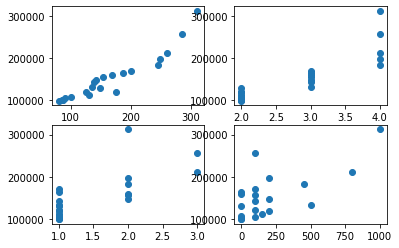

In [5]:
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.scatter(X['SquareMeterHouse'], y)
ax2.scatter(X['BedRooms'], y)
ax3.scatter(X['BathRooms'], y)
ax4.scatter(X['SquareMeterGarden'], y)
plt.show()

###Linear Regression Assumption 4 — Normality of the residuals
The fourth assumption of Linear Regression is that the residuals should follow a normal distribution. Once you obtain the residuals from your model, this is relatively easy to test using either a histogram or a QQ Plot. QQ Plots are a bit harder to read but they are more precise to interpret so let’s see how to make QQ Plots of the residuals

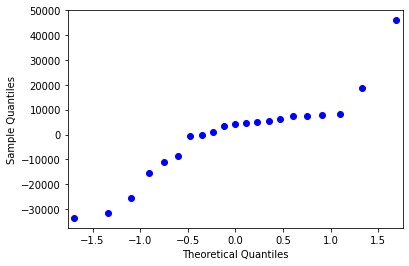

In [6]:
import statsmodels.api as sm
residuals = result.resid
sm.qqplot(residuals)
plt.show()

Understanding qq plot

https://towardsdatascience.com/q-q-plots-explained-5aa8495426c0

###Linear Regression Assumption 5 — No or little Multicollinearity
The fifth assumption of linear regression is that there is no or little multicollinearity. Multicollinearity is the phenomenon when a number of the explanatory variables are strongly correlated.
So why do we want to have strong correlations between each independent variable and the dependent variable, but no correlation between independent variables? The reason is that if two independent variables are correlated, they explain the same information. The model will not be able to know which of the two variables is actually responsible for a change in the dependent variable.
You can test for multicollinearity problems using the Variance Inflation Factor, or VIF in short. The VIF indicates for an independent variable how much it is correlated to the other independent variables. 

#VIF = 1/(1-R^2) 

#x_i = b1x1+b2x2+..+b(i-1)x(i-1) + b(i+1)x(i+1)..+ bnxn
for every independent variable

VIF = [0, infinity]
VIF = 5 -> R^2 = 0.8

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
{X.columns[i]: variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])}

{'BathRooms': 2.8893491708390076,
 'BedRooms': 6.228346746623228,
 'SquareMeterGarden': 1.7855234347718028,
 'SquareMeterHouse': 5.187199379128779}

VIF starts from 1 and has no upper limit. A VIF of 1 is the best you can have as this indicates that there is no multicollinearity for this variable. A VIF of higher than 5 or 10 indicates that there is a problem with the independent variables in your model.
In the current model, there is definitely a problem with the variables BathRooms, BedRooms and SquareMeterHouse. They seem very correlated between each other and it would be necessary to inspect which of those variables are actually needed to explain SellPrice.

###Linear Regression Assumption 6 — Homoscedasticity
The sixth assumption of linear regression is homoscedasticity. Homoscedasticity in a model means that the error is constant along the values of the dependent variable. The best way for checking homoscedasticity is to make a scatterplot with the residuals against the dependent variable.

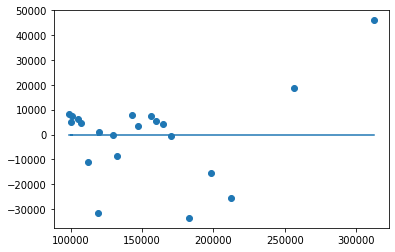

In [8]:
plt.scatter(y, residuals)
plt.plot(y, [0]*len(y))

Homoscedasticity means a constant error, you are looking for a constant deviation of the points from the zero-line. In the current case, you clearly see two outliers on the top right. In the rest of the points, you also see more points to the top and less to the bottom. This clearly does not look like a constant variance around the zero-line.
If you violate homoscedasticity, this means you have heteroscedasticity. You may want to do some work on your input data: maybe you have some variables to add or remove. Another solution is to do transformations, like applying a logistic or square root transformation to the dependent variable.
If this doesn’t change anything, you can also switch to the weighted least squares model. Weighted least squares is a model that can deal with unconstant variances and heteroscedasticity is therefore not a problem.

###Linear Regression Assumption 7 — All independent variables are uncorrelated with the error term
The seventh diagnostical check of your linear regression model serves to check whether there is correlation between any of the independent variables and the error term. If this happens, it is likely that you have a case of a misspecified model. You may have forgotten an important explanatory variable.

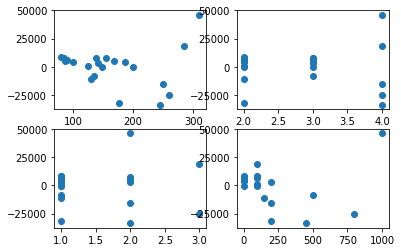

In [9]:
import matplotlib.pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.scatter(X['SquareMeterHouse'], residuals)
ax2.scatter(X['BedRooms'], residuals)
ax3.scatter(X['BathRooms'], residuals)
ax4.scatter(X['SquareMeterGarden'], residuals)
plt.show()

###Linear Regression Assumption 8 — Observations of the error term are uncorrelated with each other
The last model diagnostic that we’re going to look at is whether there is a correlation inside the observations of the error term. If this happens, you definitely violate assumption 1: the observations are not drawn randomly.

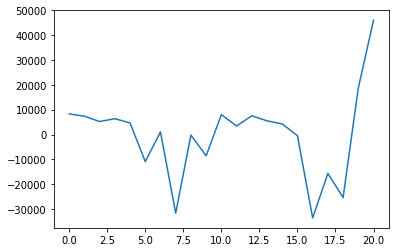

In [10]:

plt.plot(residuals.index, residuals)

What to do if your Linear Regression Assumptions are violated?

The next big question is of course what to do if you find out that one of your assumptions doesn’t hold?! Not to worry: there are things you can do for mostly all cases of invalidated assumptions. Here is an overview of which alternative methods to go to in case of invalidated assumptions:

1.   Working on your input data by doing transformations, or by adding missing variables can solve many problems
2.  Nonlinear regression is a great way to go when you find out that you have a misspecification
3. If you observe multicollinearity, you probably want to use less variables in your model. You have strongly related explanatory variables and it would be best to choose amongst them. 
4. An alternative can be to make a composite variable out of them using for example Principal Component Analysis.
5. If you observe homoscedasticity you can move to the weighted least squares model which is an alternative to the OLS that can deal with
6. If your independent variables are correlated with the error, you are very likely in a case of a misspecified model and you should work on the choice of the right variables to include in your study
7. If error terms are related to each other, you may be in a case where autocorrelation is present and you may be well of using time series models.